## Heart Disease UCI

### Context

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is a binary value 0 (no presence) 1 ( presence).
Here is the link to the dataset : https://www.kaggle.com/ronitf/heart-disease-uci

### Content

There are 14 attributes :
- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved 
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and inspecting the data

In [2]:
data = pd.read_csv("./heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape

(303, 14)

There are 303 rows and 14 columns

In [4]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Although many features are integers, except the ST depression (oldpeak) which is a float, many of them are categorical variables such as the sex, the chest pain, the fasting blood sugar,..

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The age of patients ranges from 29 to 77, the resting blood pressure has a median value of 130 mmHg.

Moreover, the serum cholestoral has a mean of 246 mg/dl 

Let us now see if there are any missing values

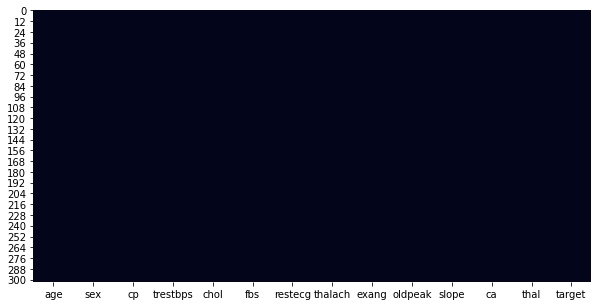

In [6]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isna(),cbar = False)

As we can see, there are no missing values in our dataset

### Exploratory Data Analysis

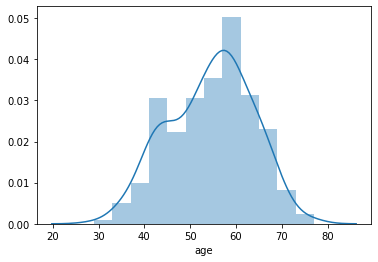

In [7]:
sns.distplot(data['age'])

Most of our patients are 50 to 65 years old.

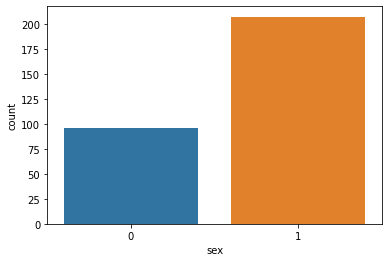

In [8]:
sns.countplot(data['sex'])

Since there are 303 patients (303 rows), we can see that approximately one third of the persons are female.

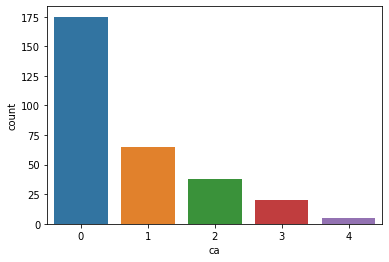

In [9]:
sns.countplot(data['ca'])

Most of our population have no majors vessels colored by flourosopy

In [10]:
effectif = data['target'].value_counts()

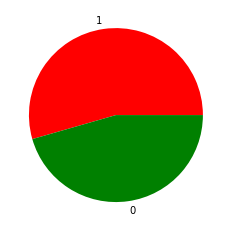

In [11]:
colors = ["red","green"]
plt.pie(effectif,labels=effectif.index,colors=colors)
plt.show()

The majority has a heart disease

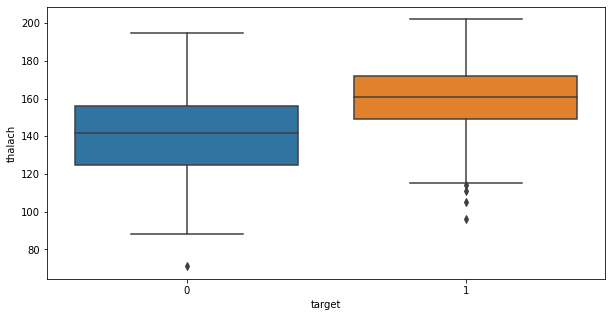

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(x='target',y='thalach',data=data)

People with more than 150 heart rate are more likely to suffer from a heart disease

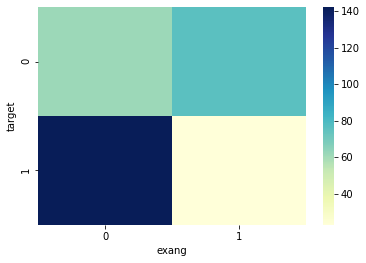

In [13]:
sns.heatmap(pd.crosstab(data.target,data.exang),cmap="YlGnBu")

There are more chances to have a heart disease if we don't have angina

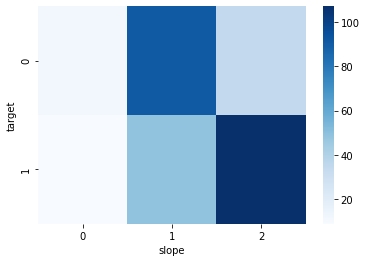

In [14]:
sns.heatmap(pd.crosstab(data.target,data.slope),cmap="Blues")

The more the slope is higher, the more are chances of having a heart disease

In [15]:
with_heart_dis = data[data.target == 1]
without_heart_dis = data[data.target == 0]

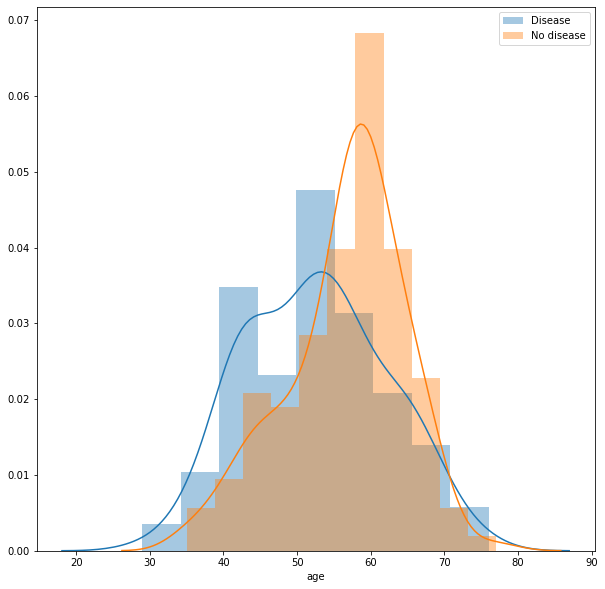

In [16]:
plt.figure(figsize=(10,10))
sns.distplot(with_heart_dis['age'], label="Disease")
sns.distplot(without_heart_dis['age'], label="No disease")
plt.legend()

According to the plot, people aged 40 to 55 years old have a heart disease, unlike those between 55 to 65

### Correlations

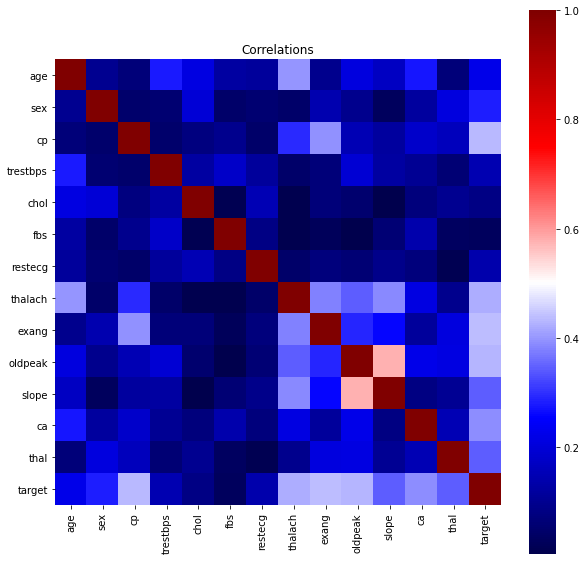

In [17]:
cor = abs(data.corr()) #we use abs (the absolute value) in order to avoid negative correlations
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(cor, square=True,cmap="seismic")
plt.title("Correlations")
plt.show()

As we can see, oldpeak is coorelated with the slope. 

That is to say, the ST depression induced by exercise relative to rest is coorelated with the slope of the peak exercise ST segment

### Preprocessing

#### Encoding

Before that we scale our dataset, we are going to encode categorical features

The function get_dumnies from pandas allows us to convert categorical variable into dummy variable. So we will store our categorical features in an list and then apply the function on it.

In [18]:
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [19]:
data_enc = pd.get_dummies(data, columns = cat_feat)

In [20]:
data_enc.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [21]:
data_enc.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

#### Scaling

Before that we split our dataset, we are going to normalize our features so that each variable, which may be measured on a different scale, contribute equally to our model.

It will help us improving the performance of our model in overall.

For this purpose, we will apply the MinMax Scaling :

$$ x_{scaled} = \frac{x-min(x)}{max(x) - min(x)} $$

where x is a feature

In [22]:
data_scaled = (data_enc - np.min(data_enc)) / (np.max(data_enc) - np.min(data_enc)).values

In [23]:
data_scaled

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,0.339623,0.283105,0.885496,0.564516,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.339623,0.178082,0.770992,0.225806,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,0.245283,0.251142,0.816794,0.129032,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.245283,0.520548,0.702290,0.096774,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.433962,0.262557,0.396947,0.032258,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
299,0.333333,0.150943,0.315068,0.465649,0.193548,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
300,0.812500,0.471698,0.152968,0.534351,0.548387,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
301,0.583333,0.339623,0.011416,0.335878,0.193548,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Splitting

We will use 80% of our dataset for training and 20% for testing

In [24]:
X = data_scaled.drop(['target'],axis=1)
y = data['target']
X.shape,y.shape

((303, 30), (303,))

In [4]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1217)

In [27]:
print("The training set has {} rows and {} columns".format(X_train.shape[0],X_train.shape[1]))
print("The testing set has {} rows and {} columns".format(X_test.shape[0],X_test.shape[1]))

The training set has 242 rows and 30 columns
The testing set has 61 rows and 30 columns


### Modelisation

We are going to fit different models of machine learning store their performances in a dictionnary

Since the outcome is a binary value, it is a classification problem, so we will train appropriate models

In [28]:
performances = dict()

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_test, y_test) * 100, 2)
acc_log

85.25

#### Support Vector Machines

In [32]:
from sklearn.svm import SVC 

In [33]:
svc = SVC()
svc.fit(X_train,y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_test, y_test) * 100, 2)
acc_svc

85.25

#### K-Nearest Neighbors

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, y_test) * 100, 2)
acc_knn

77.05

#### Gaussian Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB 

In [37]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test, y_test) * 100, 2)
acc_gaussian

75.41

#### Decision Tree


In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
acc_decision_tree

68.85

#### Random Forest


In [3]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
acc_random_forest

83.61

#### XGBoost

In [45]:
!pip install xgboost

In [44]:
from xgboost import XGBClassifier

In [45]:
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)
Y_pred = xgbc.predict(X_test)
acc_xgbc = round(xgbc.score(X_test, y_test) * 100, 2)
acc_xgbc

C:\Users\parth\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:10:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


80.33

In [74]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree','XGBoost'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_decision_tree,acc_xgbc]})
models

,Model,Score
0,Support Vector Machines,85.25
1,KNN,77.05
2,Logistic Regression,85.25
3,Random Forest,83.61
4,Naive Bayes,75.41
5,Decision Tree,68.85
6,XGBoost,80.33


In [75]:
a = models.sort_values(by="Score",ascending=False)
a

,Model,Score
0,Support Vector Machines,85.25
2,Logistic Regression,85.25
3,Random Forest,83.61
6,XGBoost,80.33
1,KNN,77.05
4,Naive Bayes,75.41
5,Decision Tree,68.85


The Random Forest and Linear SVC models performed well compared to others.

Since some of our model share the same accuracy, we are going to tune their parameters

### Optimisation

In [48]:
from sklearn.model_selection import GridSearchCV

#### Tuning Logistic Regression

In [49]:
params = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
          "penalty": ['l1', 'l2'],
          "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

logreg_t = LogisticRegression()


logreg_cv = GridSearchCV(logreg_t,params,refit=True,scoring="accuracy", verbose=1, cv=5,n_jobs=-1)

logreg_cv.fit(X_train,y_train)


Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:    4.8s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=1)

In [50]:
logreg_cv.best_params_

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [51]:
logreg_f = LogisticRegression(C= 100, penalty= 'l1', solver= 'liblinear')
logreg_f.fit(X_train,y_train)

acc_log_f = round(logreg_f.score(X_test, y_test) * 100, 2)
acc_log_f

85.25

#### Tuning Support Vector Machines

In [52]:
params = {"kernel" : ['linear', 'rbf', 'poly'],
          "gamma" : [0.1, 1, 10, 100],
          "C" : [0.1, 1, 10, 100, 1000]
         }

svc_t = SVC()


svc_cv = GridSearchCV(svc_t,params,refit=True,scoring="accuracy", verbose=1, cv=5)

svc_cv.fit(X_train,y_train)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   18.3s finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [53]:
svc_cv.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [54]:
svc_f = SVC(C=1, gamma=0.1, kernel= 'rbf')
svc_f.fit(X_train,y_train)

acc_svc_f = round(svc_f.score(X_test, y_test) * 100, 2)
acc_svc_f

86.89

#### Tuning KNN

In [55]:
params = {"n_neighbors" : range(1,20)}

knn_t = KNeighborsClassifier()


knn_cv = GridSearchCV(knn_t,params,refit=True,scoring="accuracy", verbose=1, cv=5)

knn_cv.fit(X_train,y_train)


Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    1.4s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)}, scoring='accuracy',
             verbose=1)

In [56]:
knn_cv.best_params_

{'n_neighbors': 7}

In [57]:
knn_f = KNeighborsClassifier(n_neighbors=7)
knn_f.fit(X_train,y_train)

acc_knn_f = round(knn_f.score(X_test, y_test) * 100, 2)
acc_knn_f

85.25

#### Tunning Gaussian Naive Bayes

In [58]:
params = {'var_smoothing': np.logspace(0,-9, num=100)}

gnb_t = GaussianNB()


gnb_cv = GridSearchCV(gnb_t,params,refit=True,scoring="accuracy", verbose=1, cv=5)

gnb_cv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    5.5s finished


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [59]:
gnb_cv.best_params_

{'var_smoothing': 0.15199110829529336}

In [60]:
gnb_f = GaussianNB(var_smoothing = 0.15199110829529336)
gnb_f.fit(X_train,y_train)

acc_gnb_f = round(gnb_f.score(X_test, y_test) * 100, 2)
acc_gnb_f

83.61

#### Tuning Decision Tree

In [61]:
params = {"criterion" : ["entropy","gini"],
          "max_depth" : range(1,10),
          "min_samples_split" : range(1,10),
          "min_samples_leaf" : range(1,5)
         }

dtc_t = DecisionTreeClassifier()


dtc_cv = GridSearchCV(dtc_t,params,refit=True,scoring="accuracy", verbose=1, cv=5)

dtc_cv.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\parth\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\parth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             scoring='accuracy', verbose=1)

In [62]:
dtc_cv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 4,
 'min_samples_split': 4}

In [63]:
dtc_f = DecisionTreeClassifier(criterion = 'gini',max_depth= 4,min_samples_leaf=4,min_samples_split=2)
dtc_f.fit(X_train,y_train)

acc_dtc_f = round(dtc_f.score(X_test, y_test) * 100, 2)
acc_dtc_f

70.49

#### Tuning Random Forest

In [64]:
from sklearn.model_selection import  RandomizedSearchCV

In [65]:
# n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
# max_features = ['auto', 'sqrt']
# max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
# max_depth.append(None)
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4]
# bootstrap = [True, False]

hyper_params = {'n_estimators':[200, 600, 1000, 1400, 1800],'max_features': ['auto', 'sqrt', 'log2'],'max_depth' : [20,40,60,80,100],'min_samples_split' :[2, 5, 10, 15, 100]
,'min_samples_leaf': [1, 2, 5, 10]}

rf_t = RandomForestClassifier(random_state=1746)


# rf_cv = GridSearchCV(rf_t,params,refit=True,scoring="accuracy", verbose=1, cv=5)

# rf_cv.fit(X_train,y_train)

rf_cv = RandomizedSearchCV(rf_t,hyper_params,scoring="accuracy", verbose=1, cv=5,n_iter=25)
#grid = RandomizedSearchCV(SGDC,hyper_params,scoring='recall',cv=4,n_iter=25)

#grid = RandomizedSearchCV(AdaBoost,hyper_params,scoring='recall',cv=4,n_iter=25)

rf_cv.fit(X_train,y_train)
#print(grid.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  6.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1746),
                   n_iter=25,
                   param_distributions={'max_depth': [20, 40, 60, 80, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [200, 600, 1000, 1400,
                                                         1800]},
                   scoring='accuracy', verbose=1)

In [66]:
rf_cv.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60}

In [67]:
rf_f = RandomForestClassifier(n_estimators = 600,min_samples_split=15,min_samples_leaf=2,max_features='log2',max_depth=60)
rf_f.fit(X_train,y_train)

acc_rf_f = round(rf_f.score(X_test, y_test) * 100, 2)
acc_rf_f

83.61

#### Tuning XGBoost

In [68]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [69]:
param = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=param,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 5,
    verbose=True
)
grid_search.fit(X_train,y_train)

# xgb_t = XGBClassifier()


# # rf_cv = GridSearchCV(rf_t,params,refit=True,scoring="accuracy", verbose=1, cv=5)

# # rf_cv.fit(X_train,y_train)

# xgb_cv = GridSearchCV(xgb_t,params,refit=True,scoring="accuracy", verbose=1, cv=5)
# #grid = RandomizedSearchCV(SGDC,hyper_params,scoring='recall',cv=4,n_iter=25)

# #grid = RandomizedSearchCV(AdaBoost,hyper_params,scoring='recall',cv=4,n_iter=25)

# xgb_cv.fit(X_train,y_train)
# #print(grid.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   11.5s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   22.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   41.7s


[20:21:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=10)]: Done 480 out of 480 | elapsed:   46.1s finished
C:\Users\parth\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=42,
                                     subsample=Non

In [70]:
grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}

In [71]:
xgbc_f = XGBClassifier(learning_rate=0.05, max_depth=2, n_estimators=100)
xgbc_f.fit(X_train,y_train)

acc_xgbc_f = round(xgbc_f.score(X_test, y_test) * 100, 2)
acc_xgbc_f

[20:21:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


80.33

In [72]:
models_tunned = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree','XGBoost'],
    'Score': [acc_svc_f, acc_knn_f, acc_log_f, 
              acc_rf_f, acc_gnb_f, acc_dtc_f,acc_xgbc_f]})
models_tunned

,Model,Score
0,Support Vector Machines,86.89
1,KNN,85.25
2,Logistic Regression,85.25
3,Random Forest,83.61
4,Naive Bayes,83.61
5,Decision Tree,70.49
6,XGBoost,80.33


In [73]:
b = models_tunned.sort_values(by="Score",ascending=False)
b

,Model,Score
0,Support Vector Machines,86.89
1,KNN,85.25
2,Logistic Regression,85.25
3,Random Forest,83.61
4,Naive Bayes,83.61
6,XGBoost,80.33
5,Decision Tree,70.49


Text(0.5, 1.0, 'Before tuning')

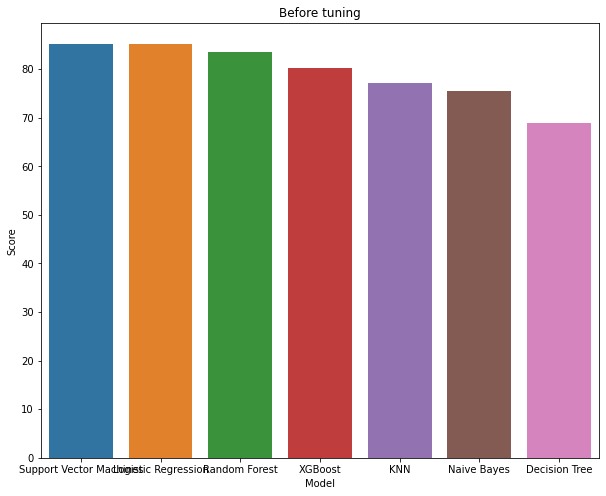

In [92]:
plt.figure(figsize=(10,8))
sns.barplot(x='Model',y='Score',data=a).set_title("Before tuning")

Text(0.5, 1.0, 'After tuning')

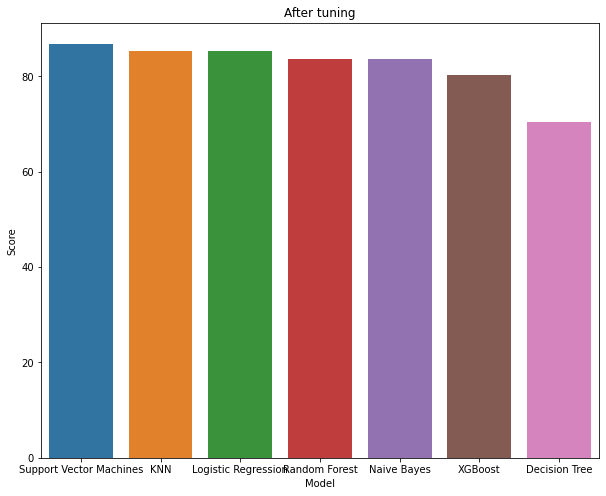

In [93]:
plt.figure(figsize=(10,8))
sns.barplot(x='Model',y='Score',data=b).set_title("After tuning")

We can observe that after tuning our models, SVM remains at the first position and Decision Tree at the last.

Accuracy for Naive Bayes and KNN has greatly improved, however it has decreased for the Random Forest and XGBoost. This might be explained by the seed. 

Let us see now which features play a big role in the random forest model.

#### Feature importance

In [5]:
X = data.drop(['target'],axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1148)

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

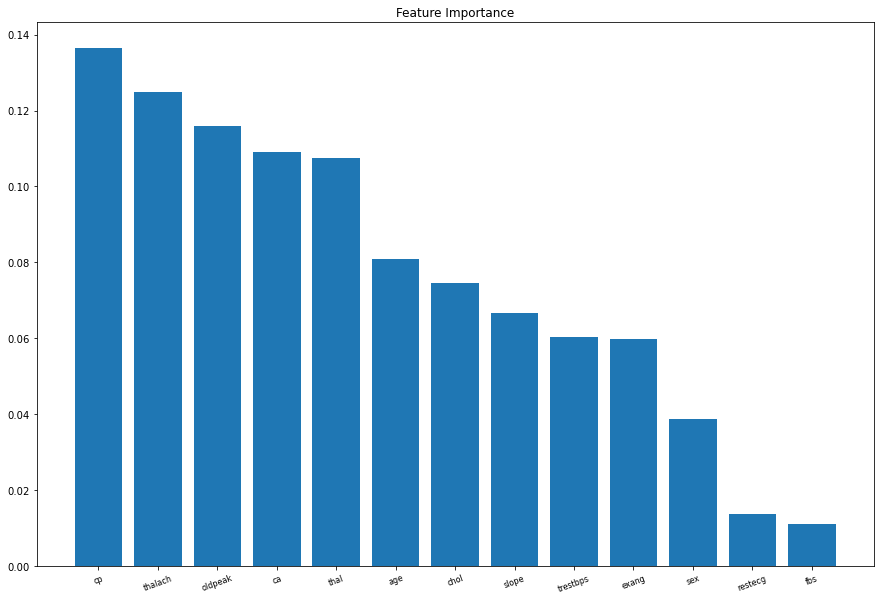

In [7]:
importances = rf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [data.columns[i] for i in indices]

plt.figure(figsize=(15,10))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=20, fontsize = 8)
plt.title("Feature Importance")
plt.show()


Thus, the most important features are cp, thalach, oldpeak, ca, and thal.

Now let us plot the confusion matrix of our SVM Model.

### Confusion Matrix

In [107]:
y_pred_svm = svc_f.predict(X_test)
cm = confusion_matrix(y_test,y_pred_svm)

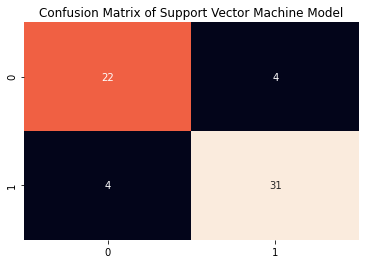

In [110]:
plt.title("Confusion Matrix of Support Vector Machine Model")
sns.heatmap(cm,annot=True,cbar=False)

So we have an accuracy of 22+31/22+31+8 = 53/61 = 87%